In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#here we have read the csv file
# converted the datset into Dataframe
readcsv = pd.read_csv("/content/drive/MyDrive/Coursework Final/15.csv")
df = pd.DataFrame(readcsv)
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,3.51
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,3.20
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,3.26
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,3.16
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,3.51
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,3.42
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,3.42
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,3.45
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,3.52


In [46]:
rows,columns =df.shape
print(f"Rows in the dataset:{rows} Columns in the dataset:{columns}")

Rows in the dataset:1143 Columns in the dataset:11


In [47]:
# Finding whether there are missing values or not in the datasets
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
sulphates,0
alcohol,0


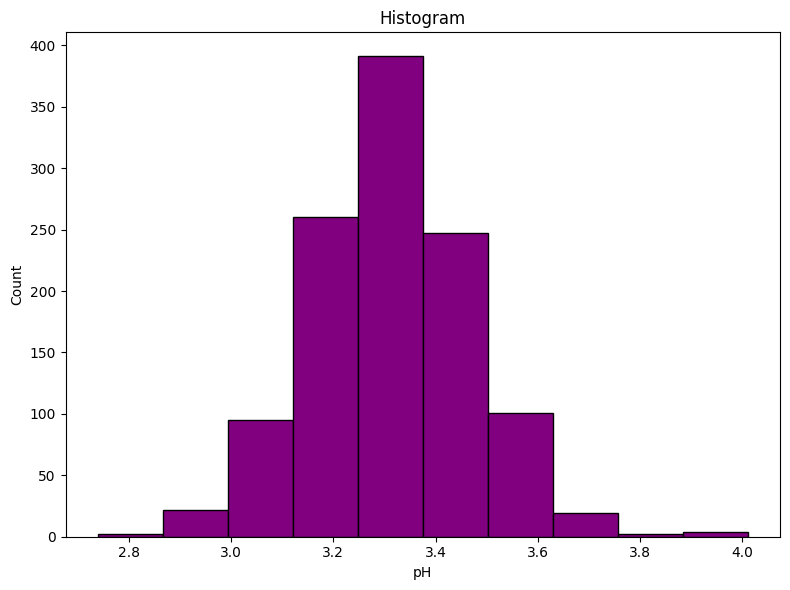

In [48]:
# Histogramm for Average Temperature
plt.figure(figsize=(8, 6))
plt.hist(df['pH'] ,bins=10, color='purple',edgecolor='black')
plt.xlabel('pH')
plt.ylabel('Count')
plt.title('Histogram')
plt.tight_layout()
plt.show()

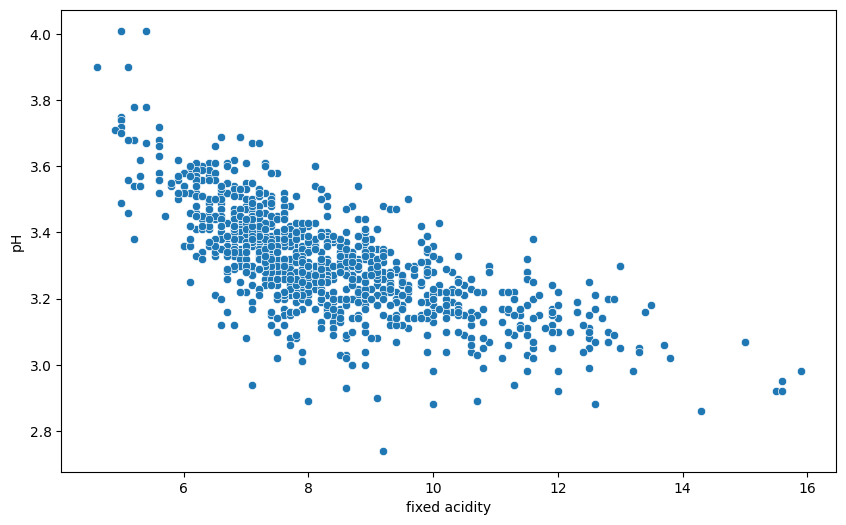

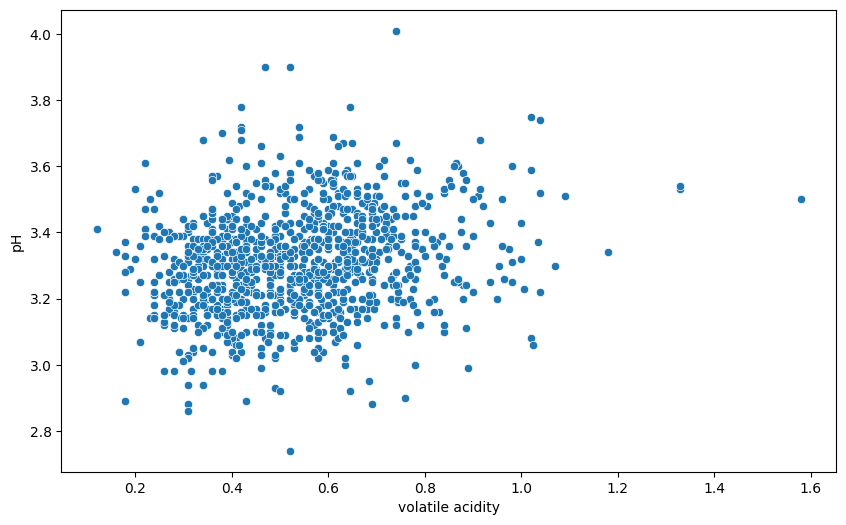

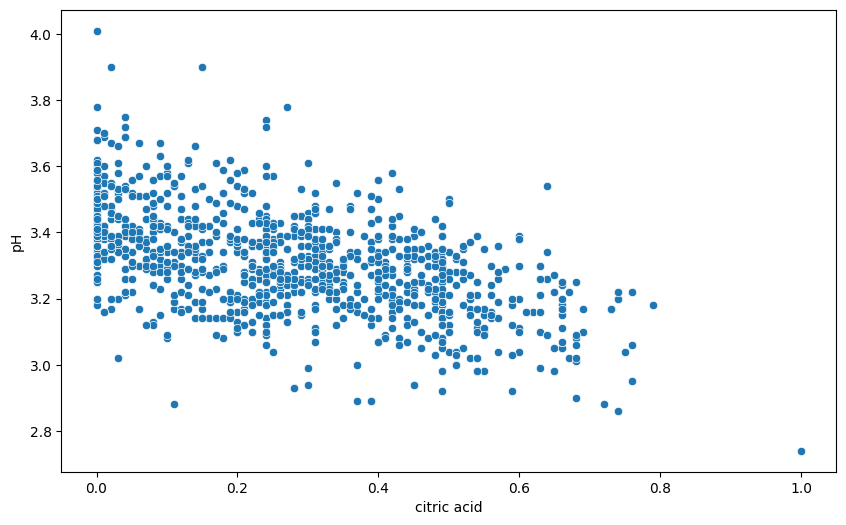

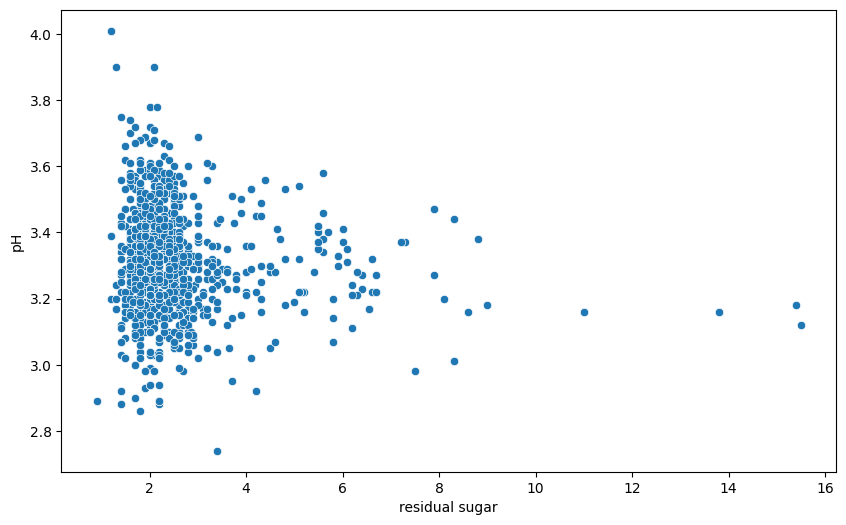

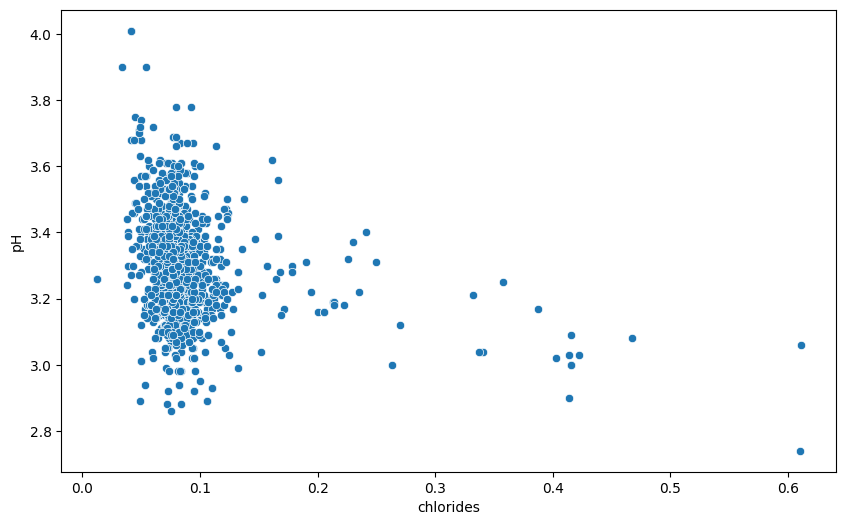

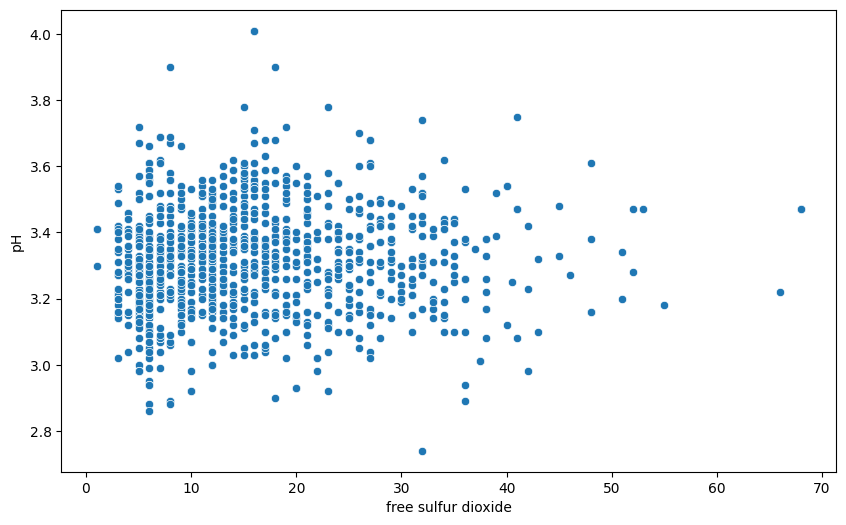

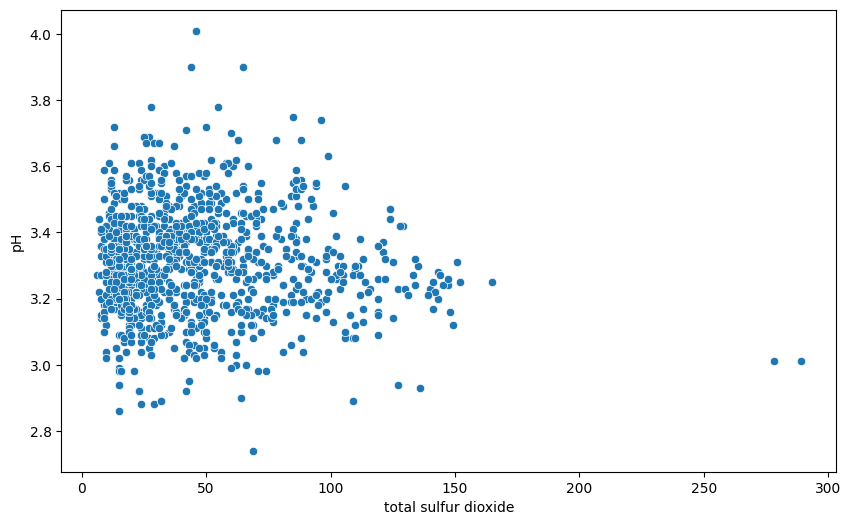

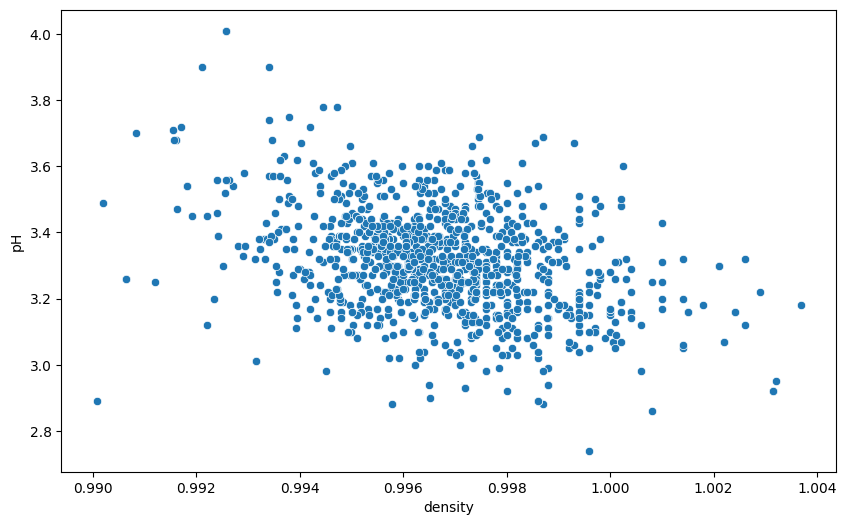

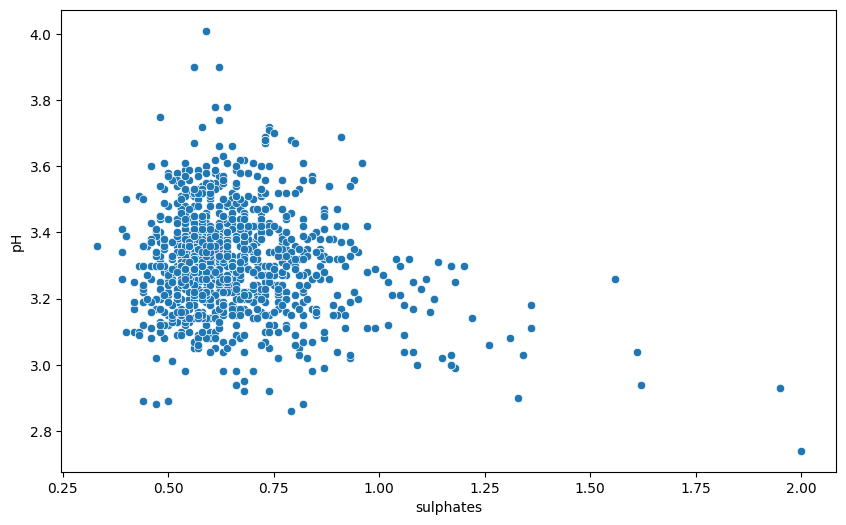

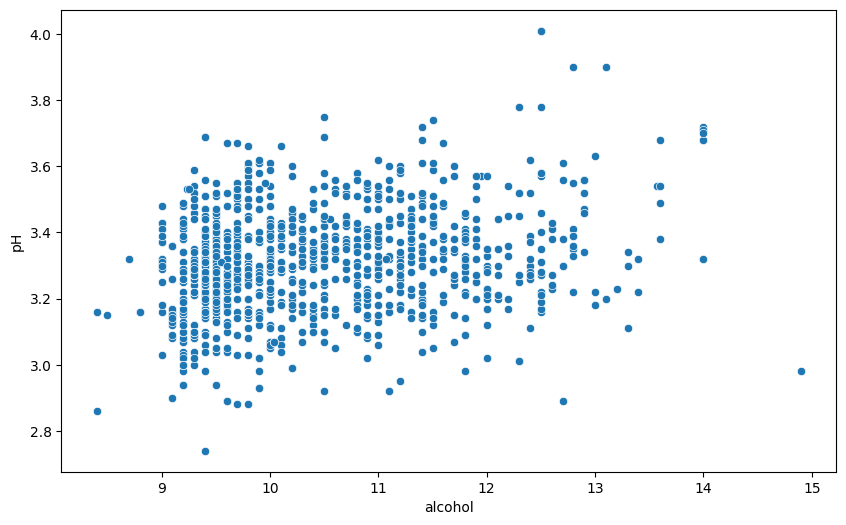

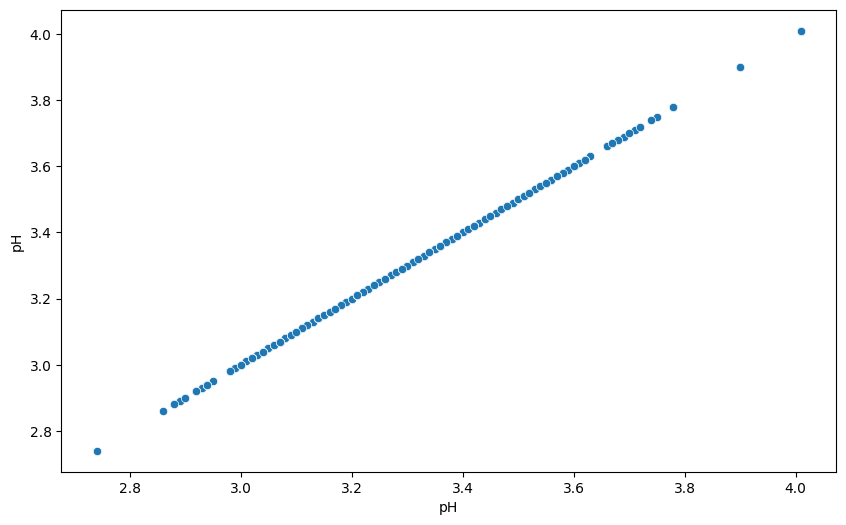

In [49]:
# scatter plots
cols = df.columns
for col in cols:
  plt.figure(figsize=(10,6))
  sns.scatterplot(x=col,y='pH',data=df)
  plt.show()




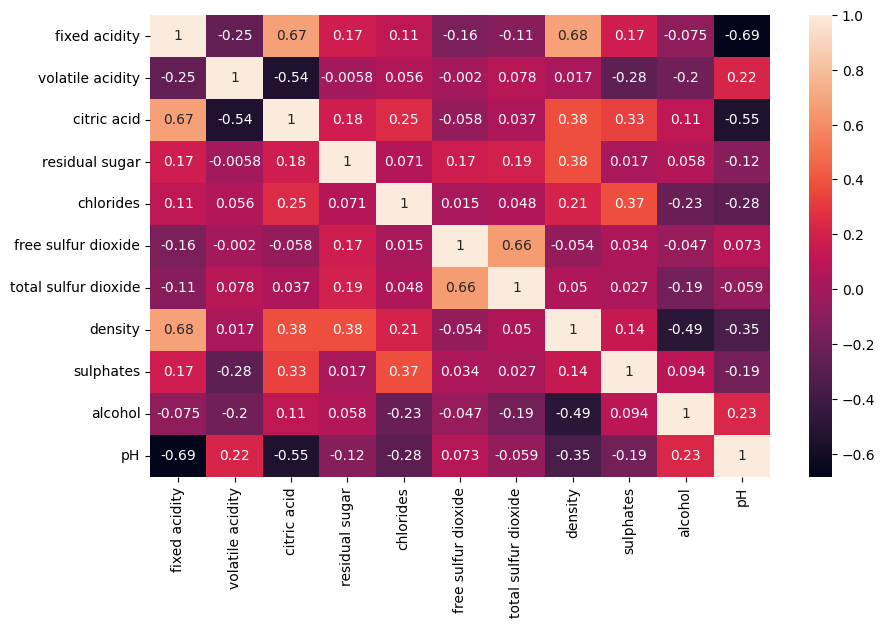

In [50]:
# heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [51]:
X = df.drop(columns=['pH']).values # Ensure numerical data type
y = df['pH'].values
def normalize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)  # Standardization
X = normalize(X)

In [52]:
# Splitting the datas for training and testing purpose
def train_test_split_custom(X, y, test_size=0.2, random_seed=42):
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(len(X) * test_size)
    train_indices = indices[test_size:]
    test_indices=indices[:test_size]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_seed=42)

Iteration 0: Cost = 11.0058
Iteration 100: Cost = 1.4808
Iteration 200: Cost = 0.2083
Iteration 300: Cost = 0.0366
Iteration 400: Cost = 0.0129


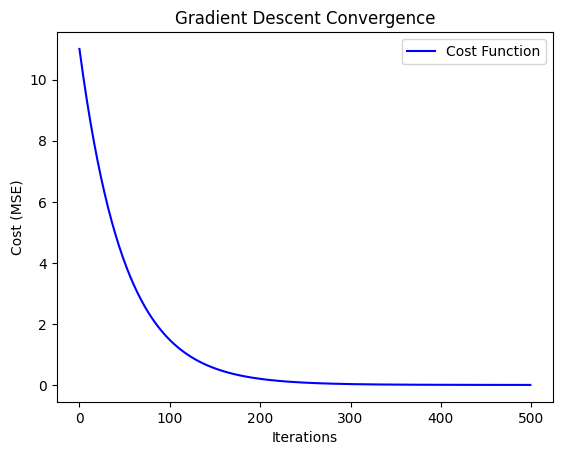

In [53]:
n_samples, n_features = X_train.shape
weights = np.zeros(n_features)
bias = 0

# Training parameters (fixed learning rate and number of iterations)
learning_rate = 0.01
num_iterations = 500

# Cost Function
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Training the model
cost_history = []
for i in range(num_iterations):
    y_pred = np.dot(X_train, weights) + bias
    dw = (1/n_samples) * np.dot(X_train.T, (y_pred - y_train))
    db = (1/n_samples) * np.sum(y_pred - y_train)
    weights -= learning_rate * dw
    bias -= learning_rate * db
    cost = cost_function(y_train, y_pred)
    cost_history.append(cost)
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost:.4f}")

# Plot cost history
plt.plot(range(len(cost_history)), cost_history, label='Cost Function', color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost (MSE)")
plt.title("Gradient Descent Convergence")
plt.legend()
plt.show()



In [54]:
# Predictions
def predict(X, weights, bias):
    return np.dot(X, weights) + bias
y_pred_train = predict(X_train, weights, bias)
y_pred_test = predict(X_test, weights, bias)

In [55]:
# Evaluation metrices
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [56]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [57]:
def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

In [58]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [59]:
# Evaluation Metrices(Root Mean Squared Error,Mean Absolute Error,Mean Squared Error,R_squared Error)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test = root_mean_squared_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

In [60]:
print(f"Linear Regression from Scratch - Train MSE: {mse_train:.4f}, Mean Absolute Error: {mae_train:.4f}, Train RMSE: {rmse_train:.4f}, Train R²: {r2_train:.4f}")
print(f"Linear Regression from Scratch - Test MSE: {mse_test:.4f}, Mean Absolute Error: {mae_test:.4f}, Test RMSE: {rmse_test:.4f}, Test R²: {r2_test:.4f}")

Linear Regression from Scratch - Train MSE: 0.0093, Mean Absolute Error: 0.0734, Train RMSE: 0.0966, Train R²: 0.6015
Linear Regression from Scratch - Test MSE: 0.0100, Mean Absolute Error: 0.0742, Test RMSE: 0.1002, Test R²: 0.6524


In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt

In [62]:
#here we have read the csv file
readcsv = pd.read_csv("/content/drive/MyDrive/Coursework Final/15.csv")
# converted the datset into Dataframe
df = pd.DataFrame(readcsv)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,pH
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,3.51
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,0.68,9.8,3.20
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,0.65,9.8,3.26
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,0.58,9.8,3.16
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,0.56,9.4,3.51
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,0.75,11.0,3.42
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,0.82,9.5,3.42
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,0.58,10.5,3.45
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,0.76,11.2,3.52


In [63]:
# Step 2: Split the dataset into training and testing sets
X = df.drop(columns=['pH'])
y = df['pH']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
# Step 3: Build and evaluate two models

# Model 1: Linear Regression
lr_model = LinearRegression()

In [65]:
# Model 2: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)


In [66]:
# Fit and evaluate both models
lr_model.fit(X_train, y_train)
rf_model .fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [67]:
# Predictions of two different models
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [68]:
# Evaluation Metrics MAE ,MSE R2 ERROR
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [69]:
# Evaluation of Linear Regression Model
mse_lr, mae_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

In [70]:
# Evaluate Random Forest Model
mse_rf, mae_rf, rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)

In [71]:
# Evaluation Results for both models
print(f"Linear Regression - MSE: {mse_lr:.4f}, MAE: {mae_lr:.4f}, RMSE: {rmse_lr:.4f}, R²: {r2_lr:.4f}")
print(f"Random Forest - MSE: {mse_rf:.4f}, MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R²: {r2_rf:.4f}")

Linear Regression - MSE: 0.0082, MAE: 0.0677, RMSE: 0.0906, R²: 0.7170
Random Forest - MSE: 0.0062, MAE: 0.0565, RMSE: 0.0789, R²: 0.7851


In [72]:
# Step 4: Hyperparameter Optimization with GridSearchCV

# # Hyperparameters for Linear Regression (None, as it doesn't have many hyperparameters)
# lr_params = {
#     # 'alpha': [0.01, 0.1, 1, 10, 100]
# }
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100, 200, 500]}
ridge_model = Ridge()
ridge_grid_search = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)
print(f"Best parameters for Ridge Regression: {ridge_grid_search.best_params_}")

Best parameters for Ridge Regression: {'alpha': 0.01}


In [73]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [74]:
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [75]:
# Best parameters for Random Forest
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [76]:
# Step 5: Feature Selection using SelectKBest
# Use SelectKBest with f_regression to select the top k features
select_k_best = SelectKBest(f_regression, k=5)  # You can adjust 'k' based on your needs
X_train_selected = select_k_best.fit_transform(X_train, y_train)
X_test_selected = select_k_best.transform(X_test)

In [77]:
# Train models with optimal hyperparameters and selected features
ridge_model_final = Ridge(alpha=ridge_grid_search.best_params_['alpha'])
ridge_model_final.fit(X_train_selected, y_train)

Ridge(alpha=0.01)

In [78]:
# Step 6: Rebuild Models using Optimal Hyperparameters and Selected Features
# Linear Regression model remains the same
ridge_model_final = Ridge(alpha=ridge_grid_search.best_params_['alpha'])
ridge_model_final.fit(X_train_selected, y_train)

Ridge(alpha=0.01)

In [79]:
# Predictions after tuning
y_pred_ridge = ridge_model_final.predict(X_test_selected)
# y_pred_rf = rf_model_final.predict(X_test_selected)

In [80]:
# Random Forest with the best hyperparameters and selected features
rf_model_selected = RandomForestRegressor(n_estimators=rf_grid_search.best_params_['n_estimators'],
                                          max_depth=rf_grid_search.best_params_['max_depth'],
                                          min_samples_split=rf_grid_search.best_params_['min_samples_split'],
                                          min_samples_leaf=rf_grid_search.best_params_['min_samples_leaf'],
                                          random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [81]:

# Predictions
y_pred_ridge = ridge_model_final.predict(X_test_selected)
y_pred_rf_selected = rf_model_selected.predict(X_test_selected)

In [82]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, rmse, r2

In [83]:
# Evaluate the final models
mse_lr_final, mae_lr_final, rmse_lr_final, r2_lr_final = evaluate_model(y_test, y_pred_ridge)
mse_rf_final, mae_rf_final, rmse_rf_final, r2_rf_final = evaluate_model(y_test, y_pred_rf_selected)

In [84]:

# Final evaluation
print(f"Final Linear Regression - MSE: {mse_lr_final:.4f}, MAE: {mae_lr_final:.4f}, RMSE: {rmse_lr_final:.4f}, R²: {r2_lr_final:.4f}")
print(f"Final Random Forest - MSE: {mse_rf_final:.4f}, MAE: {mae_rf_final:.4f}, RMSE: {rmse_rf_final:.4f}, R²: {r2_rf_final:.4f}")

# Step 7: Conclusion
# Analyze the results, compare both models, and discuss the effect of cross-validation, hyperparameter tuning, and feature selection

Final Linear Regression - MSE: 0.0114, MAE: 0.0791, RMSE: 0.1066, R²: 0.6078
Final Random Forest - MSE: 0.0066, MAE: 0.0579, RMSE: 0.0811, R²: 0.7733
